In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
import numpy as np

In [2]:
from sys import platform as _platform

#if _platform =='linux2':
#    path = '../data/data_sleep/' 
#else:
#    #mets ton path ici et ça devrait marcher :)
#    path = ""
path = ""
path = '../data/data_sleep/'

In [3]:
train=pd.read_csv(path+"input_train.csv")
test=pd.read_csv(path+"input_test.csv")
labels=pd.read_csv(path+"challenge_output_data_training_file_sleep_stages_classification.csv", sep=";")

In [4]:
labels=labels.set_index("ID")

In [5]:
pd.unique(labels["TARGET"])

array([ 3.,  2.,  4.,  0.,  1.])

In [6]:
%matplotlib inline


In [7]:
label_name = ["Wake", "Somnolence", "Intermediate Sleep", "Deep Sleep", "REM"]

([<matplotlib.axis.XTick at 0x7f1520d561d0>,
 <a list of 5 Text xticklabel objects>)

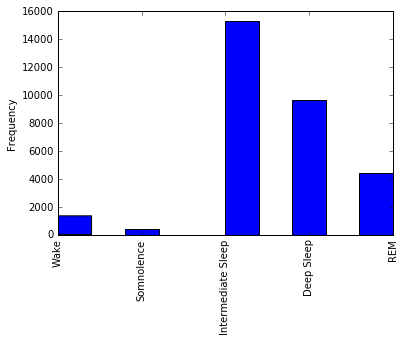

In [8]:
labels["TARGET"].plot(kind="hist"); plt.xticks(range(5), label_name, rotation=90)

In [9]:
train.columns

Index([u'ID', u'SLEEPER_ID', u'SIGNAL_ID', u'IDX_IN_NIGHT', u'EEG', u'EEG.1',
       u'EEG.2', u'EEG.3', u'EEG.4', u'EEG.5',
       ...
       u'ACC_Z.140', u'ACC_Z.141', u'ACC_Z.142', u'ACC_Z.143', u'ACC_Z.144',
       u'ACC_Z.145', u'ACC_Z.146', u'ACC_Z.147', u'ACC_Z.148', u'ACC_Z.149'],
      dtype='object', length=4204)

In [10]:
train.shape

(31129, 4204)

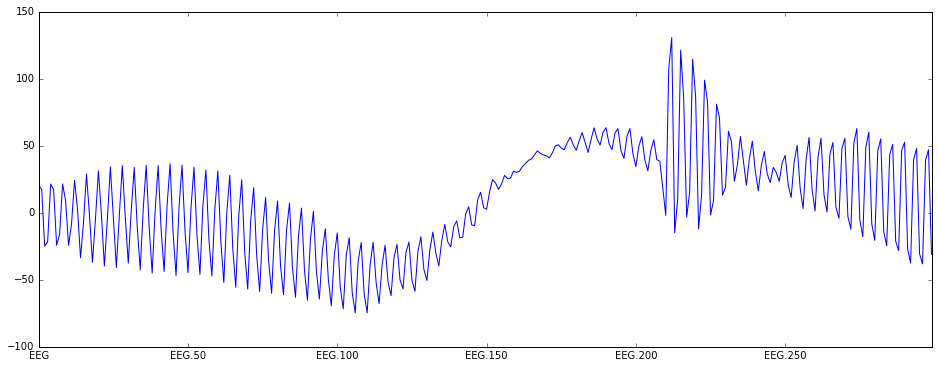

In [11]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][:300].plot(figsize=(16,6))

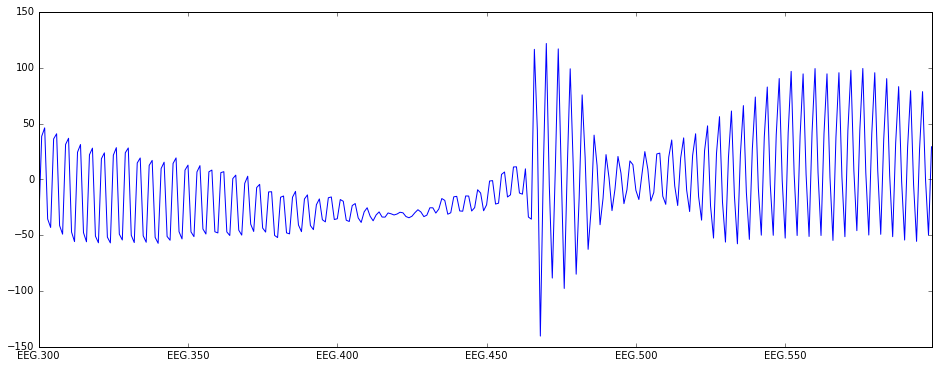

In [12]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][300:600].plot(figsize=(16,6))

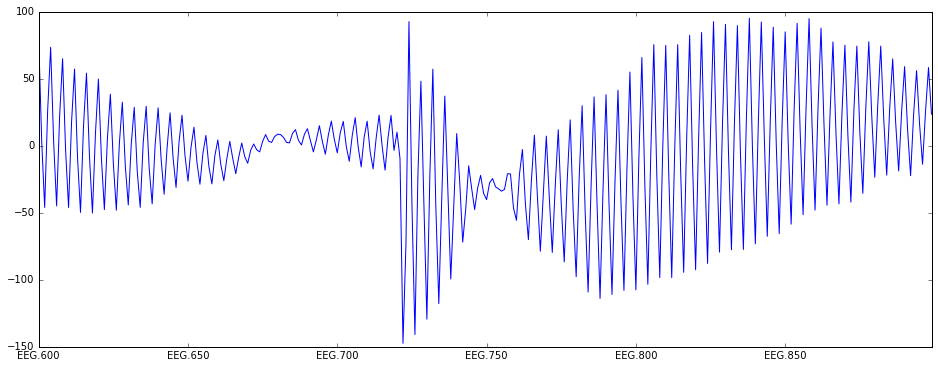

In [13]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][600:900].plot(figsize=(16,6))

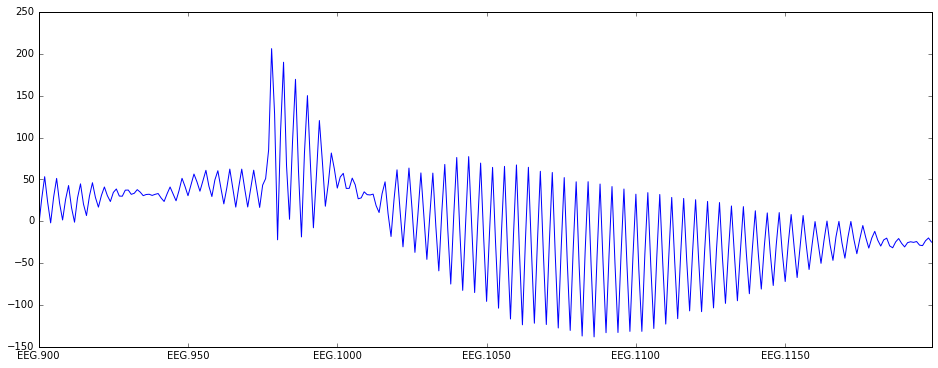

In [14]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][900:1200].plot(figsize=(16,6))

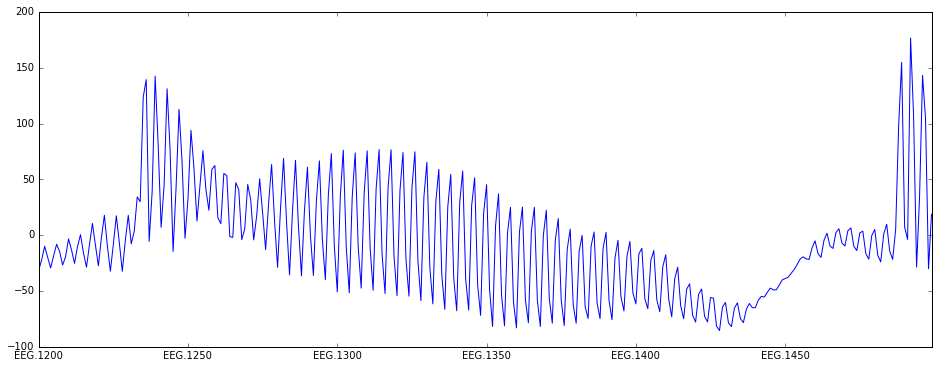

In [15]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][1200:1500].plot(figsize=(16,6))

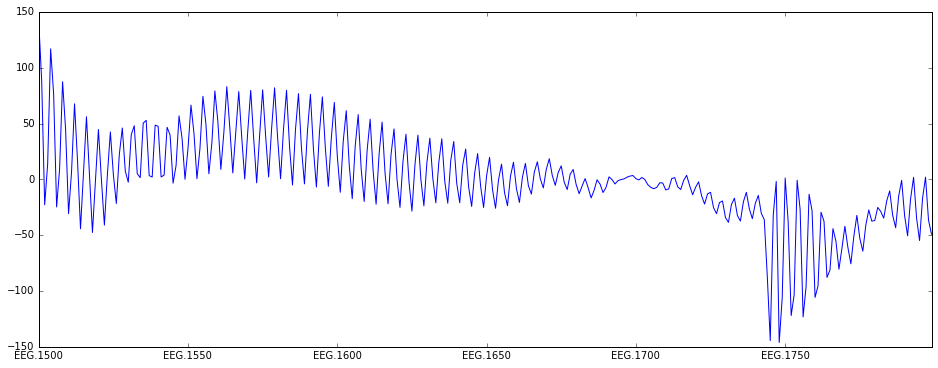

In [16]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][1500:1800].plot(figsize=(16,6))

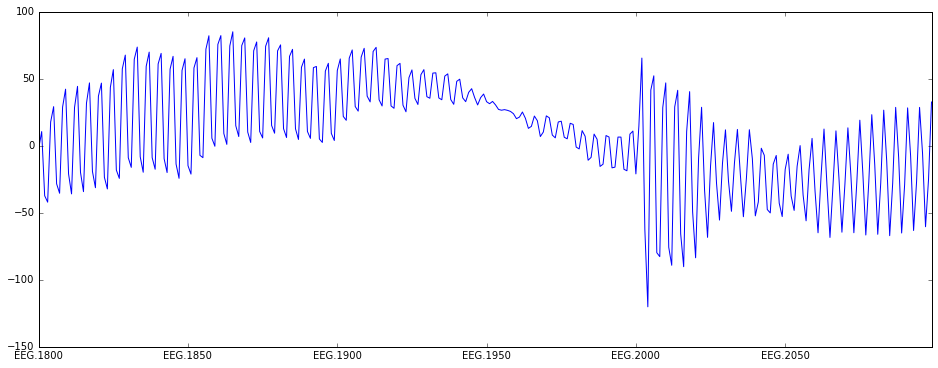

In [17]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][1800:2100].plot(figsize=(16,6))

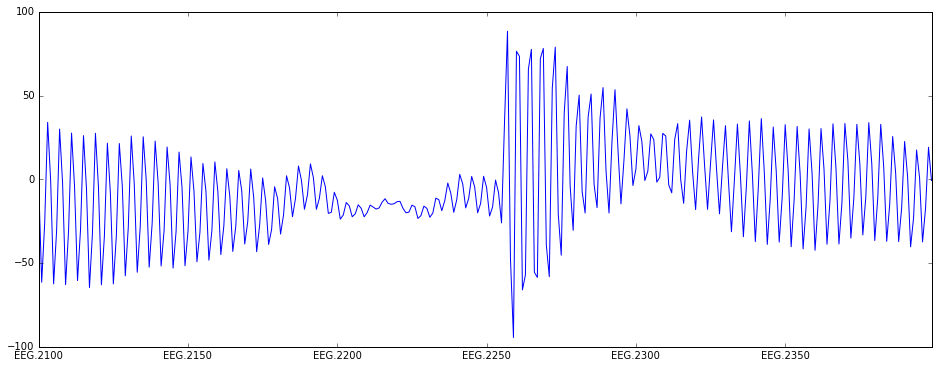

In [18]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][2100:2400].plot(figsize=(16,6))

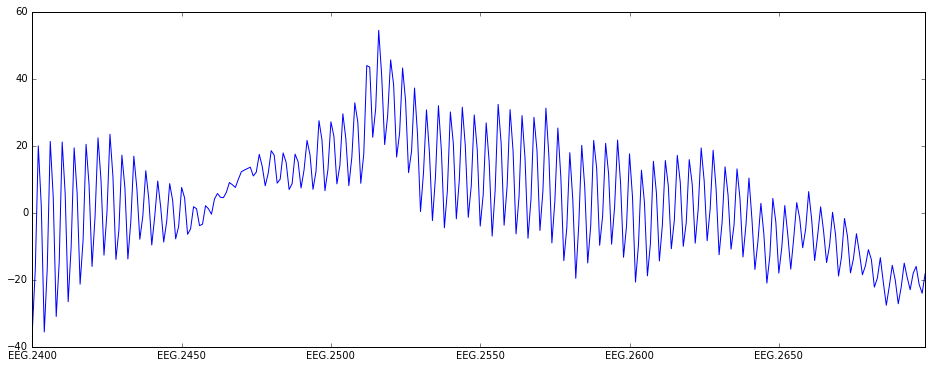

In [19]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][2400:2700].plot(figsize=(16,6))

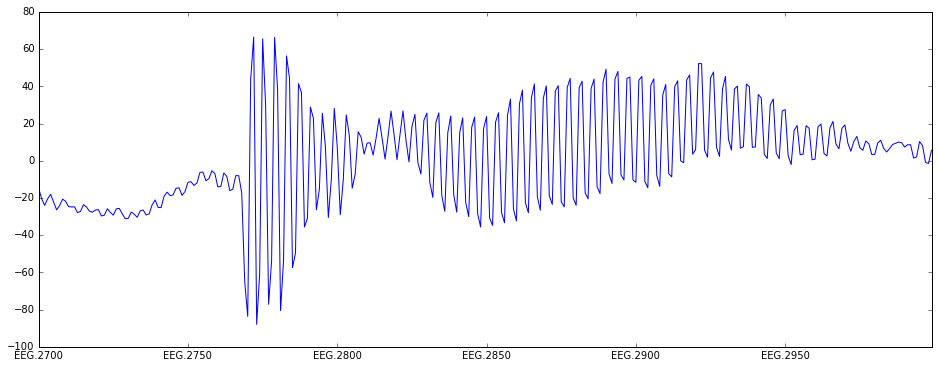

In [20]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][2700:3000].plot(figsize=(16,6))

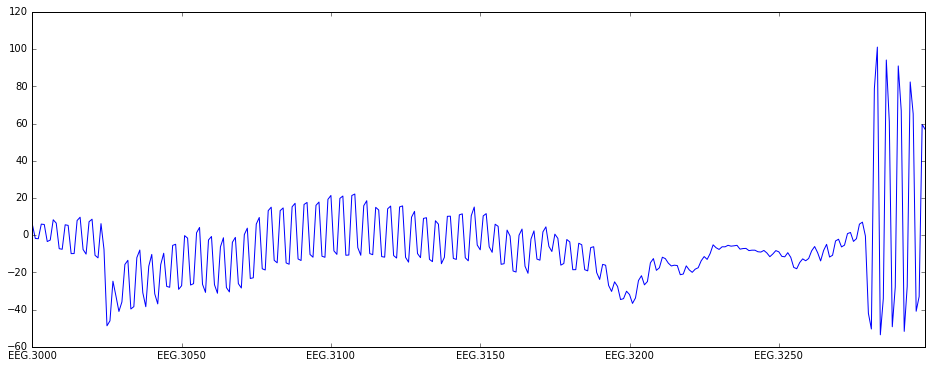

In [21]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][3000:3300].plot(figsize=(16,6))

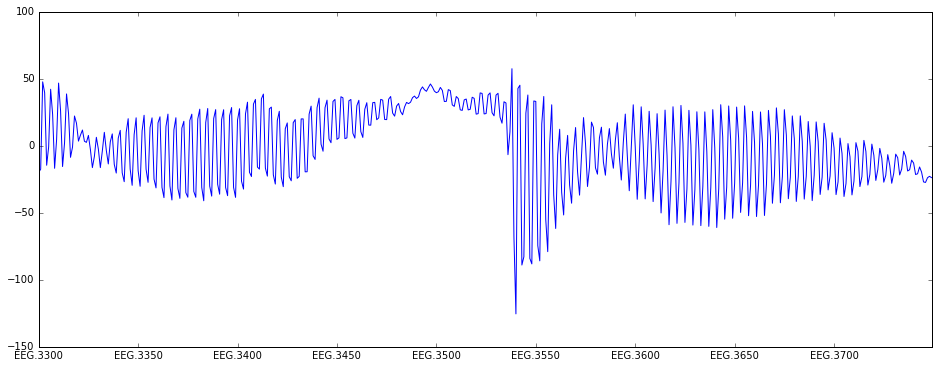

In [22]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"][3300:].plot(figsize=(16,6))

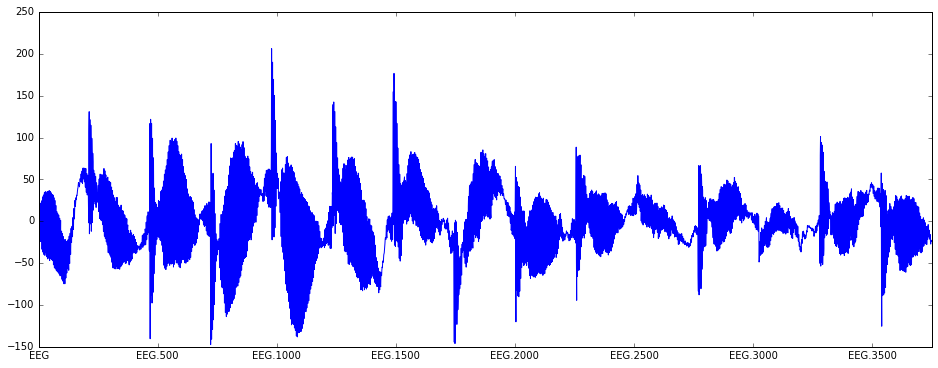

In [23]:
train.loc[0,train.columns.map(lambda x: x[:3]) == "EEG"].plot(figsize=(16,6))

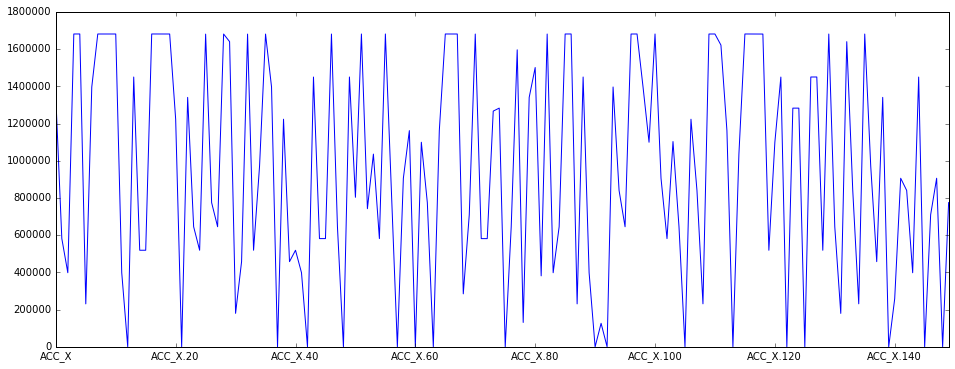

In [24]:
train.loc[0,train.columns.map(lambda x: x[:5]) == "ACC_X"].plot(figsize=(16,6))

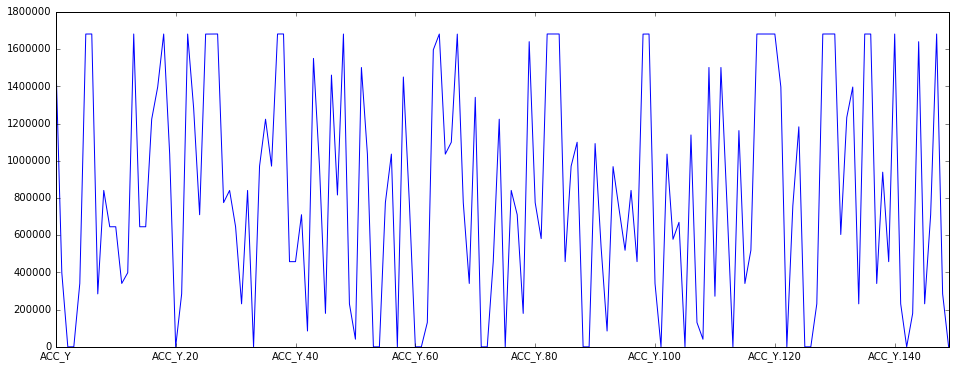

In [25]:
train.loc[0,train.columns.map(lambda x: x[:5]) == "ACC_Y"].plot(figsize=(16,6))

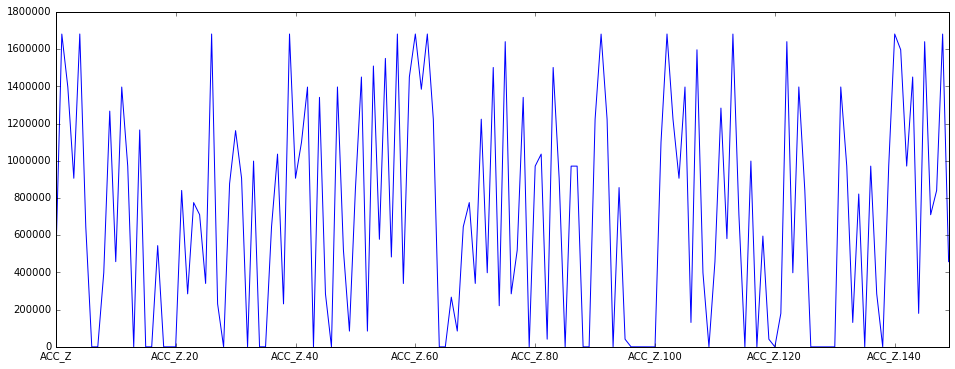

In [26]:
train.loc[0,train.columns.map(lambda x: x[:5]) == "ACC_Z"].plot(figsize=(16,6))

In [27]:
EEG = train.loc[:,train.columns.map(lambda x: x[:3]) == "EEG"]

In [28]:
def count_by_zero(array):
    counts = 0
    for i in range(0, len(array)-1):
        if np.sign(array[i]) != np.sign(array[i+1]):
            counts+=1
    return counts

In [29]:
dic_subtables = {
    "EEG": train.loc[:,train.columns.map(lambda x: x[:3]) == "EEG"],
    "ACC_X": train.loc[:,train.columns.map(lambda x: x[:5]) == "ACC_X"],
    "ACC_Y": train.loc[:,train.columns.map(lambda x: x[:5]) == "ACC_Y"],
    "ACC_Z": train.loc[:,train.columns.map(lambda x: x[:5]) == "ACC_Z"],
}

In [30]:
dic_subtables_test = {
    "EEG": test.loc[:,test.columns.map(lambda x: x[:3]) == "EEG"],
    "ACC_X": test.loc[:,test.columns.map(lambda x: x[:5]) == "ACC_X"],
    "ACC_Y": test.loc[:,test.columns.map(lambda x: x[:5]) == "ACC_Y"],
    "ACC_Z": test.loc[:,test.columns.map(lambda x: x[:5]) == "ACC_Z"],
}

In [31]:
%pdb

Automatic pdb calling has been turned ON


In [32]:
dic_subtables[dic_subtables.keys()[0]].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            31119, 31120, 31121, 31122, 31123, 31124, 31125, 31126, 31127,
            31128],
           dtype='int64', length=31129)

In [33]:
import numpy as np

In [34]:
def create_stat_features(dic_subtables):

    quantiles = pd.concat([dic_subtables[key].quantile(np.linspace(0,1,11), axis=1).T 
                           for key in dic_subtables.keys()
                          ], axis=1)
    cols_int = [["{}_quantile_{}".format(k, key) for k in range(0,110,10)]for key in dic_subtables.keys()]
    quantiles.columns = [name for list_names in cols_int for name in list_names]
    
    means = pd.concat([
            pd.Series(
                dic_subtables[key].mean(axis=1), name = "mean_{}".format(key)
            ) 
            for key in dic_subtables.keys()
        ],
                      axis=1
                         )
    var = pd.concat([
            pd.Series(
                dic_subtables[key].var(axis=1), name= "var_{}".format(key)
            ) 
            for key in dic_subtables.keys()
        ],
                      axis=1
                         )
    skew = pd.concat([
            pd.Series(
                dic_subtables[key].skew(axis=1), name = "skew_{}".format(key)
            ) 
            for key in dic_subtables.keys()
        ],
                      axis=1
                         )
    kurt = pd.concat([
            pd.Series(
                dic_subtables[key].kurtosis(axis=1), name="kurt_{}".format(key)
            )
            for key in dic_subtables.keys()
        ],
                      axis=1
                         )
    
    return pd.concat([quantiles, means, var, skew, kurt], axis=1)

In [35]:
%pdb

Automatic pdb calling has been turned OFF


In [36]:
stat_feats=pd.concat([create_stat_features(dic_subtables), dic_subtables["EEG"].apply(count_by_zero, axis=1)], axis=1)

KeyboardInterrupt: 

In [ ]:
stat_feats_test=pd.concat([create_stat_features(dic_subtables_test), dic_subtables_test["EEG"].apply(count_by_zero, axis=1)], axis=1)

In [ ]:
stat_feats=stat_feats.rename(columns ={0:"through_0"})

In [ ]:
stat_feats_test=stat_feats_test.rename(columns ={0:"through_0"})

In [ ]:
stat_feats.to_csv("data_stat_feats.csv")

In [ ]:
stat_feats_test.to_csv("data_stat_feats_test.csv")

In [ ]:
EEG = train.loc[:,train.columns.map(lambda x: x[:3]) == "EEG"]

In [ ]:
EEG.head()

In [ ]:
stat_feats.shape

In [ ]:
import re

In [ ]:
re.search("EEG[0,9]*", "EEG100").group(0)

In [ ]:
train_eeg = train.filter(regex='EEG[0-9]*').values

In [ ]:
X_fft = np.fft.fft(train_eeg)

In [ ]:
X_fft.shape, train_eeg.shape

In [ ]:
X_fft

In [ ]:
train

In [ ]:
freq = np.fft.fftfreq(15*250, 1./250)
plt.plot(freq[0:len(freq)/2],np.abs(X_fft[0][0:len(X_fft[0])/2]))
plt.grid()
plt.show()

In [ ]:
def filt(y,low, high, freq): 
    filter_array = [i for i,f in enumerate(freq) if f>=low and f<=high]
    return np.array([y[i] for i in filter_array])

In [ ]:
plt.plot(filt(freq,1,50,freq),np.abs(filt(X_fft[18],1,50,freq)))
plt.grid()
plt.show()

In [ ]:
X_fft.apply(lambda x: filt(y,1,50,x))

In [ ]:
X_ffr = np.apply_along_axis(lambda x: filt(x,1,50,freq), 1 , abs(X_fft))

In [ ]:
X_ffr.shape

In [ ]:
filtered_freq = filt(freq,1,50,freq)
X_fft = pd.DataFrame(X_ffr, columns= ["freq"+str(f) for f in filtered_freq])

In [ ]:
X_fft.to_csv("data_frequences.csv")